<a href="https://colab.research.google.com/github/syedabasmah/deceptive_reviews_detection/blob/main/project/OTT_implementation_fourth_setting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ott Dataset Implementation**

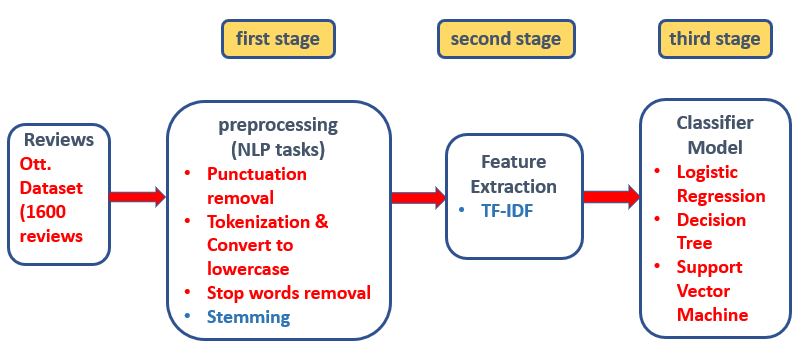

# **First Phase: PRE-PROCESSING**

This includes data analysis, train-test split & building NLP pipeline

**Import the libraries:**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read the file:**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/deceptive-opinion.csv')

**Data analysis:**

In [ ]:
df.describe()

,deceptive,hotel,polarity,source,text
count,1600,1600,1600,1600,1600
unique,2,20,2,3,1596
top,truthful,conrad,positive,MTurk,The Omni was chosen for it's location whichwor...
freq,800,80,800,800,2


In [ ]:
df.deceptive.value_counts()

truthful     800
deceptive    800
Name: deceptive, dtype: int64

In [ ]:
df.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [ ]:
df.shape

(1600, 5)

**Are there any missing values?**

In [ ]:
df.isnull().sum()

deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

In [ ]:
df.dtypes

deceptive    object
hotel        object
polarity     object
source       object
text         object
dtype: object

**Drop irrelevant features (i.e., hotel, source, polarity):**

In [ ]:
df.drop(['hotel', 'source', 'polarity'], axis=1, inplace=True)

In [ ]:
df.shape

(1600, 2)

**Applying label encoding to the target feature (i.e., deceptive):**

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['deceptive_LabEnc'] = LabelEncoder().fit_transform(df['deceptive'])
df.drop('deceptive', axis=1, inplace=True)

In [ ]:
df.head()

,text,deceptive_LabEnc
0,We stayed for a one night getaway with family ...,1
1,Triple A rate with upgrade to view room was le...,1
2,This comes a little late as I'm finally catchi...,1
3,The Omni Chicago really delivers on all fronts...,1
4,I asked for a high floor away from the elevato...,1


**Building Natural Language Processing (NLP) pipeline:**

**1. Removing punctuation:**

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(txt):
  txt_nopunc = "".join([c for c in txt if c not in string.punctuation])
  return txt_nopunc

In [ ]:
df['text_no_punc'] = df['text'].apply(lambda x: remove_punctuation(x))

In [ ]:
df.head()

,text,deceptive_LabEnc,text_no_punc
0,We stayed for a one night getaway with family ...,1,We stayed for a one night getaway with family ...
1,Triple A rate with upgrade to view room was le...,1,Triple A rate with upgrade to view room was le...
2,This comes a little late as I'm finally catchi...,1,This comes a little late as Im finally catchin...
3,The Omni Chicago really delivers on all fronts...,1,The Omni Chicago really delivers on all fronts...
4,I asked for a high floor away from the elevato...,1,I asked for a high floor away from the elevato...


**2. Tokenization:**

In [ ]:
import re #regular expression (built in package)

def tokenize(txt):
  tokens = re.split('\W+', txt)
  return tokens 

df['text_tokenized'] = df['text_no_punc'].apply(lambda x: tokenize(x.lower()))

In [ ]:
df.head()

,text,deceptive_LabEnc,text_no_punc,text_tokenized
0,We stayed for a one night getaway with family ...,1,We stayed for a one night getaway with family ...,"[we, stayed, for, a, one, night, getaway, with..."
1,Triple A rate with upgrade to view room was le...,1,Triple A rate with upgrade to view room was le...,"[triple, a, rate, with, upgrade, to, view, roo..."
2,This comes a little late as I'm finally catchi...,1,This comes a little late as Im finally catchin...,"[this, comes, a, little, late, as, im, finally..."
3,The Omni Chicago really delivers on all fronts...,1,The Omni Chicago really delivers on all fronts...,"[the, omni, chicago, really, delivers, on, all..."
4,I asked for a high floor away from the elevato...,1,I asked for a high floor away from the elevato...,"[i, asked, for, a, high, floor, away, from, th..."


**3. Removing stop words:**

In [ ]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
def remove_stopwords(text_tokenized):
  text_removed_stopwords = [word for word in text_tokenized if word not in stopwords]
  return text_removed_stopwords

df['text_no_stopword'] = df['text_tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
df.head()

,text,deceptive_LabEnc,text_no_punc,text_tokenized,text_no_stopword
0,We stayed for a one night getaway with family ...,1,We stayed for a one night getaway with family ...,"[we, stayed, for, a, one, night, getaway, with...","[stayed, one, night, getaway, family, thursday..."
1,Triple A rate with upgrade to view room was le...,1,Triple A rate with upgrade to view room was le...,"[triple, a, rate, with, upgrade, to, view, roo...","[triple, rate, upgrade, view, room, less, 200,..."
2,This comes a little late as I'm finally catchi...,1,This comes a little late as Im finally catchin...,"[this, comes, a, little, late, as, im, finally...","[comes, little, late, im, finally, catching, r..."
3,The Omni Chicago really delivers on all fronts...,1,The Omni Chicago really delivers on all fronts...,"[the, omni, chicago, really, delivers, on, all...","[omni, chicago, really, delivers, fronts, spac..."
4,I asked for a high floor away from the elevato...,1,I asked for a high floor away from the elevato...,"[i, asked, for, a, high, floor, away, from, th...","[asked, high, floor, away, elevator, got, room..."


**4. Stemming**

You may perform any of the two i.e., stemming or lemmatization
A better efficient way to proceed is to first lemmatise and then stem, but stemming alone is also fine for few problems statements, here we will not lemmatise.

In [ ]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()
dir(ps) # functions available in PorterStemmer

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [ ]:
print(ps.stem('coder'))
print(ps.stem('coding'))
print(ps.stem('got'))

coder
code
got


In [ ]:
def stemming(text_no_stopword):
  text = [ps.stem(word) for word in text_no_stopword]
  return text

df['text_stemmed'] = df['text_no_stopword'].apply(lambda x: stemming(x))

In [ ]:
df.head()

,text,deceptive_LabEnc,text_no_punc,text_tokenized,text_no_stopword,text_stemmed
0,We stayed for a one night getaway with family ...,1,We stayed for a one night getaway with family ...,"[we, stayed, for, a, one, night, getaway, with...","[stayed, one, night, getaway, family, thursday...","[stay, one, night, getaway, famili, thursday, ..."
1,Triple A rate with upgrade to view room was le...,1,Triple A rate with upgrade to view room was le...,"[triple, a, rate, with, upgrade, to, view, roo...","[triple, rate, upgrade, view, room, less, 200,...","[tripl, rate, upgrad, view, room, less, 200, a..."
2,This comes a little late as I'm finally catchi...,1,This comes a little late as Im finally catchin...,"[this, comes, a, little, late, as, im, finally...","[comes, little, late, im, finally, catching, r...","[come, littl, late, im, final, catch, review, ..."
3,The Omni Chicago really delivers on all fronts...,1,The Omni Chicago really delivers on all fronts...,"[the, omni, chicago, really, delivers, on, all...","[omni, chicago, really, delivers, fronts, spac...","[omni, chicago, realli, deliv, front, spacious..."
4,I asked for a high floor away from the elevato...,1,I asked for a high floor away from the elevato...,"[i, asked, for, a, high, floor, away, from, th...","[asked, high, floor, away, elevator, got, room...","[ask, high, floor, away, elev, got, room, plea..."


In [ ]:
df.drop('text', axis=1, inplace=True)

In [ ]:
df.drop('text_no_punc', axis=1, inplace=True)

In [ ]:
df.drop('text_tokenized', axis=1, inplace=True)

In [ ]:
df.drop('text_no_stopword', axis=1, inplace=True)

In [ ]:
df.head()

,deceptive_LabEnc,text_stemmed
0,1,"[stay, one, night, getaway, famili, thursday, ..."
1,1,"[tripl, rate, upgrad, view, room, less, 200, a..."
2,1,"[come, littl, late, im, final, catch, review, ..."
3,1,"[omni, chicago, realli, deliv, front, spacious..."
4,1,"[ask, high, floor, away, elev, got, room, plea..."


**Separate data into X and Y:**

In [ ]:
X = df.text_stemmed
Y = df.deceptive_LabEnc

In [ ]:
X = X.astype(str)

**Split the data into train, validation and test:**

In [ ]:
from sklearn.model_selection import train_test_split
X_main, X_test, Y_main, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)
X_train, X_val, Y_train, Y_val = train_test_split(X_main, Y_main, test_size=0.2, random_state=1, stratify=Y_main)

# **Second Phase: FEATURE ENGINEERING**

**Term Frequency - Inverse Document Frequency (TF-IDF):**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_vect = TfidfVectorizer()
X_train_tf = tf_vect.fit_transform(X_train)
X_val_tf = tf_vect.transform(X_val)
X_test_tf = tf_vect.transform(X_test)

In [ ]:
X_train_tf.shape

(1024, 6108)

In [ ]:
X_val_tf.shape

(256, 6108)

In [ ]:
X_test_tf.shape

(320, 6108)

# **Third Phase: CLASSIFIER MODELS & PERFORMANCE EVALUATION**

**Data standardization:**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train_tf)
X_val = scaler.transform(X_val_tf)
X_test = scaler.transform(X_test_tf)

**1. Logistic Regression Model:**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_val_predict = log_reg.predict(X_val)

**Evaluation of the model on validation data:**

**i. Accuracy score:**

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_val, Y_val_predict))

0.81640625


**ii. Classification report:**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, Y_val_predict))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       128
           1       0.85      0.77      0.81       128

    accuracy                           0.82       256
   macro avg       0.82      0.82      0.82       256
weighted avg       0.82      0.82      0.82       256



**iii. Confusion matrix:**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_val, Y_val_predict)
cm1 = pd.DataFrame(data=cm, index=['Deceptive','Truthful'],columns=['Deceptive','Truthful'])
cm1

,Deceptive,Truthful
Deceptive,111,17
Truthful,30,98


**Evaluation of the model on test data:**

In [ ]:
Y_test_predict = log_reg.predict(X_test)

**i. Accuracy score:**

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_test_predict))

0.828125


**ii. Classification report:**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_predict))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       160
           1       0.84      0.81      0.83       160

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320



**iii. Confusion matrix:**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_test_predict)
cm1 = pd.DataFrame(data=cm, index=['Deceptive','Truthful'],columns=['Deceptive','Truthful'])
cm1

,Deceptive,Truthful
Deceptive,135,25
Truthful,30,130


**2. Decision Tree Model:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_val_predict = dec_tree_model.predict(X_val)

**Evaluation of the model on validation data:**

**i. Accuracy score:**

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_val, Y_val_predict))

0.671875


**ii. Classification report:**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, Y_val_predict))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       128
           1       0.69      0.62      0.65       128

    accuracy                           0.67       256
   macro avg       0.67      0.67      0.67       256
weighted avg       0.67      0.67      0.67       256



**iii. Confusion matrix:**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_val, Y_val_predict)
cm1 = pd.DataFrame(data=cm, index=['Deceptive','Truthful'],columns=['Deceptive','Truthful'])
cm1

,Deceptive,Truthful
Deceptive,93,35
Truthful,49,79


**Evaluation of the model on test data:**

In [ ]:
Y_test_predict = dec_tree_model.predict(X_test)

**i. Accuracy score:**

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_test_predict))

0.65625


**ii. Classification report:**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_predict))

              precision    recall  f1-score   support

           0       0.67      0.62      0.65       160
           1       0.65      0.69      0.67       160

    accuracy                           0.66       320
   macro avg       0.66      0.66      0.66       320
weighted avg       0.66      0.66      0.66       320



**iii. Confusion matrix:**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_test_predict)
cm1 = pd.DataFrame(data=cm, index=['Deceptive','Truthful'],columns=['Deceptive','Truthful'])
cm1

,Deceptive,Truthful
Deceptive,100,60
Truthful,50,110


**3. Support Vector Machine Model:**

In [ ]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, Y_train)

SVC()

In [ ]:
Y_val_predict = svm_model.predict(X_val)

**Evaluation of the model on validation data:**

**i. Accuracy score:**

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_val, Y_val_predict))

0.76171875


**ii. Classification report:**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, Y_val_predict))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       128
           1       0.76      0.77      0.76       128

    accuracy                           0.76       256
   macro avg       0.76      0.76      0.76       256
weighted avg       0.76      0.76      0.76       256



**iii. Confusion matrix:**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_val, Y_val_predict)
cm1 = pd.DataFrame(data=cm, index=['Deceptive','Truthful'],columns=['Deceptive','Truthful'])
cm1

,Deceptive,Truthful
Deceptive,97,31
Truthful,30,98


**Evaluation of the model on test data:**

In [ ]:
Y_test_predict = svm_model.predict(X_test)

**i. Accuracy score:**

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_test_predict))

0.69375


**ii. Classification report:**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_predict))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       160
           1       0.68      0.74      0.71       160

    accuracy                           0.69       320
   macro avg       0.70      0.69      0.69       320
weighted avg       0.70      0.69      0.69       320



**iii. Confusion matrix:**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_test_predict)
cm1 = pd.DataFrame(data=cm, index=['Deceptive','Truthful'],columns=['Deceptive','Truthful'])
cm1

,Deceptive,Truthful
Deceptive,104,56
Truthful,42,118
